In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image, ImageOps

In [2]:
(train_images, train_labels),(test_images, test_labels) = tf.keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
train_images[200]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  29, 197,
        255,  84,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  85, 251,
        253,  83,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  86, 253,
        254, 253,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  85, 251,
        253, 251,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  86, 253,
        254, 253, 169,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  85, 251,
        253, 251, 168,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  86, 253,
        254, 253, 169,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  28, 196,
        253, 251, 168,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 169,
        254, 253, 169,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 168,
        253, 251, 168,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 169,
        254, 253, 169,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 168,
        253, 251, 168,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        254, 253, 254, 139,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        253, 251, 253, 251,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        254, 253, 254, 253,  57,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        253, 251, 253, 251, 168,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        198, 253, 254, 253, 114,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         85, 251, 253, 251,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         85, 253, 254, 253,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         28,  83, 196,  83,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   

In [4]:
train_labels[200]

np.uint8(1)

In [5]:
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

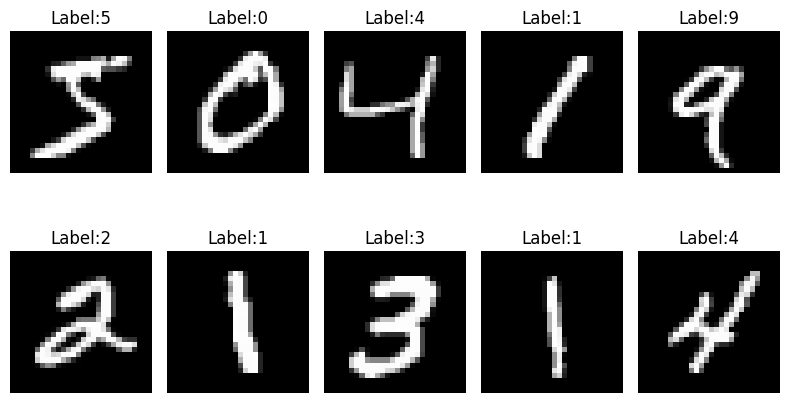

In [6]:
plt.figure(figsize=(8,5))
for i in range(10):
  plt.subplot(2,5, i+1)
  img = train_images[i]
  plt.imshow(img, cmap='gray')
  plt.title(f"Label:{train_labels[i]}")
  plt.axis('off')
plt.tight_layout()

In [7]:
train_images = train_images.reshape((-1,28,28,1))
test_images = test_images.reshape((-1,28,28,1))

In [8]:
train_labels = tf.keras.utils.to_categorical(train_labels)
test_labels = tf.keras.utils.to_categorical(test_labels)

In [9]:
def create_model():
  model = models.Sequential([
      layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
      layers.BatchNormalization(),
      layers.MaxPooling2D((2,2)),

      layers.Conv2D(64, (3,3), activation='relu'),
      layers.BatchNormalization(),
      layers.MaxPooling2D((2,2)),

      layers.Conv2D(64, (3,3), activation='relu'),
      layers.BatchNormalization(),

      layers.Flatten(),

      layers.Dense(128, activation='relu'),
      layers.Dropout(0.5),
      layers.Dense(10, activation='softmax')
  ])
  return model

In [10]:
model = create_model()
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics = ['accuracy'])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
early_stopping = callbacks.EarlyStopping(patience=5,
                                         restore_best_weights=True)

In [13]:
reduce_lr = callbacks.ReduceLROnPlateau(factor=0.2, patience=3)

In [14]:
history = model.fit(train_images, train_labels,
                    epochs=30,
                    validation_split=0.10,
                    callbacks=[early_stopping,reduce_lr])

Epoch 1/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 89s 50ms/step - accuracy: 0.8962 - loss: 0.3351 - val_accuracy: 0.9875 - val_loss: 0.0409 - learning_rate: 0.0010
Epoch 2/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 74s 44ms/step - accuracy: 0.9790 - loss: 0.0705 - val_accuracy: 0.9848 - val_loss: 0.0511 - learning_rate: 0.0010
Epoch 3/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 72s 43ms/step - accuracy: 0.9851 - loss: 0.0517 - val_accuracy: 0.9897 - val_loss: 0.0431 - learning_rate: 0.0010
Epoch 4/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 90s 48ms/step - accuracy: 0.9873 - loss: 0.0410 - val_accuracy: 0.9898 - val_loss: 0.0414 - learning_rate: 0.0010
Epoch 5/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 75s 44ms/step - accuracy: 0.9905 - loss: 0.0315 - val_accuracy: 0.9938 - val_loss: 0.0261 - learning_rate: 2.0000e-04
Epoch 6/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 71s 42ms/step - accuracy: 0.9949 - loss: 0.0158 - val_accuracy: 0.9930 - val_loss: 0.0287 - learning_rate: 2.0000e-04
Epoch 7/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 71s 42ms/step 

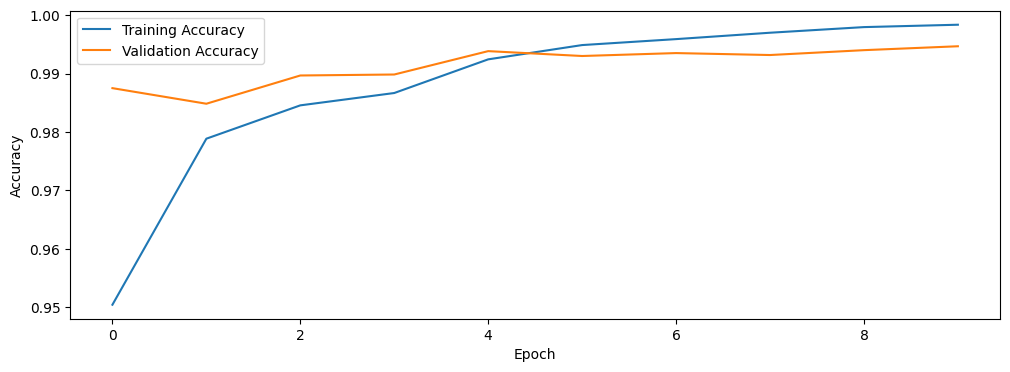

In [15]:
plt.figure(figsize=(12,4))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

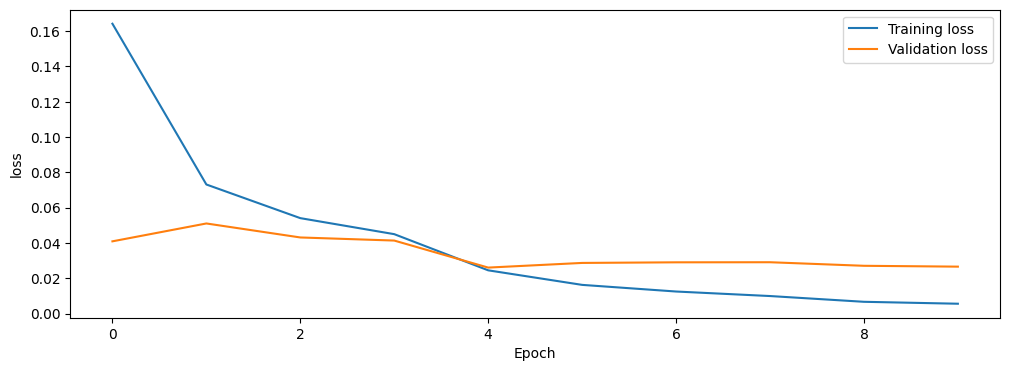

In [16]:
plt.figure(figsize=(12,4))
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.xlabel("Epoch")
plt.ylabel("loss")
plt.legend()

In [18]:
model.save("mnist_cnn_model.keras")

In [17]:
def predict_image(image_path, model):
  img = Image.open(image_path).convert('L')
  img = ImageOps.invert(img)
  img = img.resize((28,28))
  img_array = np.array(img)
  img_array = img_array.astype("float32")/255
  img_array = img_array.reshape((1,28,28,1))


  prediction = model.predict(img_array)
  predicted_class = np.argmax(prediction)
  confidence = np.max(prediction)
  return predicted_class, confidence

In [19]:
def load_model_and_predict(image_path):
  loaded_model = tf.keras.models.load_model("mnist_cnn_model.keras")

  predicted_class, confidence = predict_image(image_path, loaded_model)
  print(f"Predicted digit : {predicted_class}")
  print(f"Confidence : {confidence}")
  img = Image.open(image_path).convert("L")
  plt.imshow(img, cmap='gray')
  plt.title(f"Predicted: {predicted_class} || confidence : {confidence:.2f}")
  plt.axis("off")


In [23]:
from google.colab import files
files.upload()

Saving Screenshot 2026-02-18 111530.png to Screenshot 2026-02-18 111530.png


{'Screenshot 2026-02-18 111530.png': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01-\x00\x00\x00\xfd\x08\x06\x00\x00\x00\xe9\xaa!u\x00\x00\x00\x01sRGB\x00\xae\xce\x1c\xe9\x00\x00\x00\x04gAMA\x00\x00\xb1\x8f\x0b\xfca\x05\x00\x00\x00\tpHYs\x00\x00\x0e\xc3\x00\x00\x0e\xc3\x01\xc7o\xa8d\x00\x000\xe3IDATx^\xed\xddil\x1ce\x9e?\xf0o\x1d}\xb8}\xb6\xef#\xbe\x1d\xdb9\x9c\x10B\x88s\xc22\xc0N $\xe2\x0c\x0c\x0c\xb0\xa3E\xda\xddwh\x85v\xa5\x9d\x91\x10+\xed\x9b=4\xd2\xcejw\xc3\xcc\xec\xcc\x0e3\xc02\x07\x81\x1c\x04H \x07G\x88\xe3\x1c\xce\xe1\x1c\x8e\x13\xdfW;v\xfb\xea\xab\xea\xf9\xbf\xf8\xd7S\xaa.\xb7\x93\xb6\xbbmwu~\x1f\xa9e\xe8*W\x97\xe9\xee/\xbf\xe7\xa9\xe7yJ`\x8c1\x10B\x88E\x88\xe6\'\x08!$\x91Qh\x11B,\x85B\x8b\x10b)\x14Z\x84\x10K\xa1\xd0"\x84X\n\x85\x16!\xc4R(\xb4\x08!\x96B\xa1E\x08\xb1\x14\n-B\x88\xa5Ph\x11B,\x85B\x8b\x10b)\x14Z\x84\x10K\xa1\xd0"\x84X\n\x85\x16!\xc4R(\xb4\x08!\x96B\xa1E\x08\xb1\x14\n-B\x88\xa5Ph\x11B,\x85B\x8b\x10b)\x14Z\x84\x10K\xa1\xd0"\x84X\n\x85\x16!\xc4R(\xb4\x08!\x96B\xa

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
Predicted digit : 8
Confidence : 0.9830917716026306


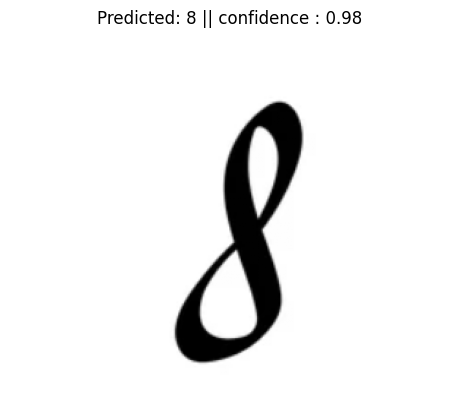

In [24]:
load_model_and_predict("Screenshot 2026-02-18 111530.png")